In [ ]:
import numpy as np # linear algebra
import pandas as pd
from google.colab import drive
import  seaborn as sns 
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/BigBasketDataset.xlsx'

In [ ]:
df1 = pd.read_excel(path, sheet_name = 1)
 

In [ ]:
df_result=pd.read_excel(path,sheet_name=0)

In [ ]:
df1.head(7)

,Member,Order,SKU,Date,Description
0,M09736,6468572,34993740,2014-09-22,Other Sauces
1,M09736,6468572,15669800,2014-09-22,Cashews
2,M09736,6468572,34989501,2014-09-22,Other Dals
3,M09736,6468572,7572303,2014-09-22,Namkeen
4,M09736,6468572,15669856,2014-09-22,Sugar
5,M09736,6468572,15668478,2014-09-22,Banana
6,M09736,6468572,21409124,2014-09-22,Sugar Cubes


In [ ]:
df1.tail()

,Member,Order,SKU,Date,Description
59239,M64379,8381435,15670260,2013-11-16,Organic F&V
59240,M64379,8381435,15668597,2013-11-16,Exotic Vegetables
59241,M64379,8381435,7570555,2013-11-16,Shoe Polish
59242,M64379,8381435,7587490,2013-11-16,Organic Dals & Pulses
59243,M64379,8381435,15669830,2013-11-16,Other Rice Products


In [ ]:
features=df1.columns.values

### **Exploring the features**

In [ ]:
print(features)

['Member' 'Order' 'SKU' 'Date' 'Description']


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59244 entries, 0 to 59243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Member       59244 non-null  object        
 1   Order        59244 non-null  int64         
 2   SKU          59244 non-null  int64         
 3   Date         59244 non-null  datetime64[ns]
 4   Description  59244 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.3+ MB


### There are no null vales in the dataset

In [ ]:
df1.describe()

,Order,SKU
count,5.924400e+04,5.924400e+04
mean,7.649632e+06,1.770956e+07
std,4.980484e+05,1.446290e+07
min,6.422558e+06,6.884195e+06
25%,7.466278e+06,1.566838e+07
50%,7.722039e+06,1.566852e+07
75%,7.991492e+06,1.566987e+07
max,8.388492e+06,9.331950e+07


### **Unique categorical values in data frame**

In [ ]:
items=df1.Description.unique()

In [ ]:
print(items)

['Other Sauces' 'Cashews' 'Other Dals' 'Namkeen' 'Sugar' 'Banana'
 'Sugar Cubes' 'Other Sweets' 'Other Rice Products' 'Utensil Scrub Pads'
 'Toor Dal' 'Buns & Pavs' 'Cakes' 'Boiled Rice' 'Urad Dal' 'Jaggery'
 'Raisins' 'Chips' 'Almonds' 'Root Vegetables' 'Other Vegetables'
 'Moong Dal' 'Healthy Snacks' 'Raw Peanuts' 'Mosquito Repellent'
 'Whole Spices' 'Soya Products' 'Beans' 'Health Drinks'
 'Liquid Soaps & Bars' 'Washing Bars' 'Ghee' 'Organic F&V'
 'Sunflower Oils' 'Shoe Polish' 'Cream Biscuits' 'Cookies' 'Snacky Nuts'
 'Avalakki / Poha' 'Besan' 'Raw Rice' 'Powdered Spices' 'Eggs'
 'Corn Snacks' 'Bread' 'Instant Noodles' 'Gourd & Cucumber'
 'Shaving Cream, Foam & Gels' 'Brinjals' 'Hair Oil' 'Other Dry Fruits'
 'Basmati Rice' 'Face Wash' 'Yogurt & Lassi' 'Wafers' 'Ground Coffee'
 'Instant Pastas' 'Sooji & Rava' 'Cooking Paste' 'Other Flours'
 'Shaving Brush' 'Chilli & Soya Sauces' 'Vermicelli'
 'Glucose, Marie & Milk Biscuits' 'Diapers & Wipes' 'Tomato Ketchup'
 'Organic Rice & Rice P

In [ ]:
unique_squ=df1.SKU.unique()

In [ ]:
print(unique_squ)

[34993740 15669800 34989501 ...  7585834 34994304 34990383]


In [ ]:
dict={}
j=0
for i in items:
  dict[i]=unique_squ[j]
  j=j+1


In [ ]:
print(dict)

{'Other Sauces': 34993740, 'Cashews': 15669800, 'Other Dals': 34989501, 'Namkeen': 7572303, 'Sugar': 15669856, 'Banana': 15668478, 'Sugar Cubes': 21409124, 'Other Sweets': 34938526, 'Other Rice Products': 15669778, 'Utensil Scrub Pads': 34989440, 'Toor Dal': 15669830, 'Buns & Pavs': 7569799, 'Cakes': 34991046, 'Boiled Rice': 15669878, 'Urad Dal': 34991191, 'Jaggery': 7585573, 'Raisins': 15669789, 'Chips': 15669767, 'Almonds': 15669814, 'Root Vegetables': 15669865, 'Other Vegetables': 15669965, 'Moong Dal': 34934493, 'Healthy Snacks': 15669811, 'Raw Peanuts': 15669780, 'Mosquito Repellent': 15668465, 'Whole Spices': 15668381, 'Soya Products': 15669869, 'Beans': 15669804, 'Health Drinks': 92388181, 'Liquid Soaps & Bars': 15669972, 'Washing Bars': 15669803, 'Ghee': 15669861, 'Organic F&V': 21409002, 'Sunflower Oils': 34993978, 'Shoe Polish': 15669884, 'Cream Biscuits': 29247229, 'Cookies': 15669777, 'Snacky Nuts': 29247171, 'Avalakki / Poha': 34989441, 'Besan': 15668467, 'Raw Rice': 15668

In [ ]:
df1.Member.nunique()

106

In [ ]:
df1.Order.nunique()

8001

#### Analyzing which of the groccery item is in high demand

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


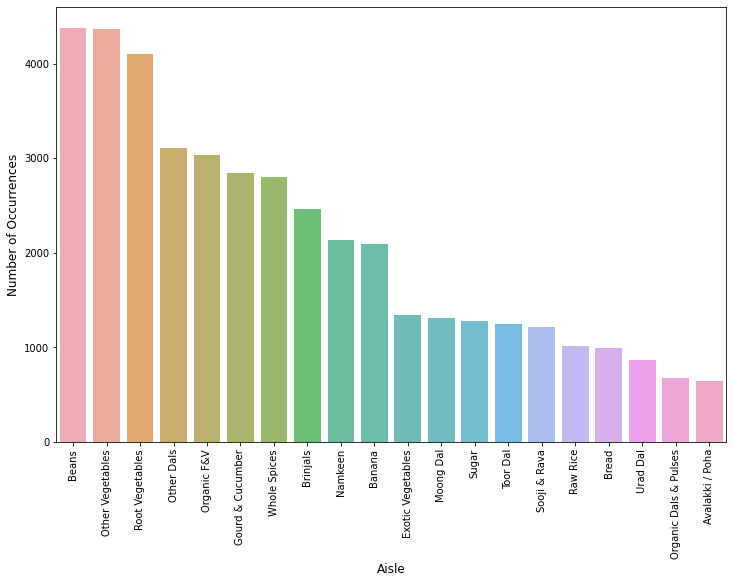

In [ ]:
cnt_srs = df1['Description'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The top 2 aisles are Beans and other vegetables

### Analyzing grocerry product with least demand

### **Total Products**

In [ ]:
all_products = df1['Description'].unique()
print("Total products: {}".format(len(all_products)))

Total products: 214


In [ ]:
print(all_products)

['Other Sauces' 'Cashews' 'Other Dals' 'Namkeen' 'Sugar' 'Banana'
 'Sugar Cubes' 'Other Sweets' 'Other Rice Products' 'Utensil Scrub Pads'
 'Toor Dal' 'Buns & Pavs' 'Cakes' 'Boiled Rice' 'Urad Dal' 'Jaggery'
 'Raisins' 'Chips' 'Almonds' 'Root Vegetables' 'Other Vegetables'
 'Moong Dal' 'Healthy Snacks' 'Raw Peanuts' 'Mosquito Repellent'
 'Whole Spices' 'Soya Products' 'Beans' 'Health Drinks'
 'Liquid Soaps & Bars' 'Washing Bars' 'Ghee' 'Organic F&V'
 'Sunflower Oils' 'Shoe Polish' 'Cream Biscuits' 'Cookies' 'Snacky Nuts'
 'Avalakki / Poha' 'Besan' 'Raw Rice' 'Powdered Spices' 'Eggs'
 'Corn Snacks' 'Bread' 'Instant Noodles' 'Gourd & Cucumber'
 'Shaving Cream, Foam & Gels' 'Brinjals' 'Hair Oil' 'Other Dry Fruits'
 'Basmati Rice' 'Face Wash' 'Yogurt & Lassi' 'Wafers' 'Ground Coffee'
 'Instant Pastas' 'Sooji & Rava' 'Cooking Paste' 'Other Flours'
 'Shaving Brush' 'Chilli & Soya Sauces' 'Vermicelli'
 'Glucose, Marie & Milk Biscuits' 'Diapers & Wipes' 'Tomato Ketchup'
 'Organic Rice & Rice P

### One-hot representation of products purchased

In [ ]:
one_hot = pd.get_dummies(df1['Description'])
df1.drop('Description', inplace=True, axis=1)
df1 = df1.join(one_hot)
df1.head()

,Member,Order,SKU,Date,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,"CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books",Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,...,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
0,M09736,6468572,34993740,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M09736,6468572,15669800,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,M09736,6468572,34989501,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,M09736,6468572,7572303,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M09736,6468572,15669856,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Transactions**

In [ ]:
# Note: if a customer bought multiple products on same day, We will consider it one transaction
df2 = df1.groupby(["Member","Date"])[all_products[:]].apply(sum)
records = df2.reset_index()[all_products]

In [ ]:
df2.tail()

Other Sauces  ...  Dishwash Liquids & Pastes
Member Date                      ...                           
M99206 2014-08-26             0  ...                          0
       2014-09-05             0  ...                          0
       2014-09-22             0  ...                          0
       2014-10-04             0  ...                          0
       2014-10-06             0  ...                          0

[5 rows x 214 columns]

In [ ]:
index=(df2.index[0])

In [ ]:
## Replacing non-zero values with product names
def get_Pnames(x):
    for product in all_products:
        if x[product] > 0:
            x[product] = product
    return x

records = records.apply(get_Pnames, axis=1)
records.head()

,Other Sauces,Cashews,Other Dals,Namkeen,Sugar,Banana,Sugar Cubes,Other Sweets,Other Rice Products,Utensil Scrub Pads,Toor Dal,Buns & Pavs,Cakes,Boiled Rice,Urad Dal,Jaggery,Raisins,Chips,Almonds,Root Vegetables,Other Vegetables,Moong Dal,Healthy Snacks,Raw Peanuts,Mosquito Repellent,Whole Spices,Soya Products,Beans,Health Drinks,Liquid Soaps & Bars,Washing Bars,Ghee,Organic F&V,Sunflower Oils,Shoe Polish,Cream Biscuits,Cookies,Snacky Nuts,Avalakki / Poha,Besan,...,Organic Baby Foods,Exam Boards,Car Freshener,"Scissors, Glue & Tape",Womens Deo,Office Stationery,Ready Masalas,Body Wash,Fertilizers & Pesticides,Paneer & Tofu,Organic Breakfast Cereals,Green Tea,Drain Cleaners,Toilet Paper,Groundnut Oils,Mixed Fruit Jam,Fryums & Papad,Disposable Plates & Utensils,Containers,Colours,"Cutters, Peelers & Scrapers",Battery,Chocolate,Tea,Festive Gift Packs,Organic Edible Oils & Ghee,After Shave,Dairy & Cheese,Heat & Eat Ready Meals,Festive Gift Pack,Mukhwas & Mouth Freshener,Sanitary Aids,Pens,Mango Pickle,Printer Cartridges & Printing Paper,Body Lotion,Talc,Eye Care & Kajal,Cookery Books,Dishwash Liquids & Pastes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Root Vegetables,0,Moong Dal,0,0,0,0,0,0,0,0,0,0,Organic F&V,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Other Vegetables,0,0,0,0,0,0,Beans,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,Other Dals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Almonds,0,0,0,0,0,0,0,0,0,Health Drinks,0,0,0,0,0,0,0,0,0,0,Besan,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Root Vegetables,0,0,0,0,0,0,0,0,0,0,0,Ghee,Organic F&V,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunflower Oils,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Removing zeros
x = records.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

In [ ]:
transactions[0:10]

[['Root Vegetables', 'Moong Dal', 'Organic F&V', 'Bread', 'Yogurt & Lassi'],
 ['Other Vegetables',
  'Beans',
  'Brinjals',
  'Glucose, Marie & Milk Biscuits',
  'Regular Pasta',
  'Exotic Vegetables',
  'Pasta & Noodles'],
 ['Other Dals',
  'Almonds',
  'Health Drinks',
  'Besan',
  'Sooji & Rava',
  'Liquid Detergent',
  'Ready Mix'],
 ['Root Vegetables',
  'Ghee',
  'Organic F&V',
  'Basmati Rice',
  'Exotic Vegetables',
  'Honey'],
 ['Sunflower Oils'],
 ['Banana',
  'Other Vegetables',
  'Organic F&V',
  'Exotic Vegetables',
  'Ready Mix'],
 ['Root Vegetables',
  'Other Vegetables',
  'Organic F&V',
  'Glucose, Marie & Milk Biscuits',
  'Butter & Cream'],
 ['Banana', 'Root Vegetables', 'Exotic Vegetables'],
 ['Other Dals',
  'Root Vegetables',
  'Other Vegetables',
  'Moong Dal',
  'Mosquito Repellent',
  'Brinjals',
  'Glucose, Marie & Milk Biscuits',
  'Baking Ingredients'],
 ['Sugar',
  'Almonds',
  'Root Vegetables',
  'Other Vegetables',
  'Whole Spices',
  'Beans',
  'Organic

### **Total unique members**

In [ ]:
all_members = df1['Member'].unique()

In [ ]:
print(all_members)

['M09736' 'M39021' 'M47229' 'M76390' 'M77779' 'M78365' 'M78720' 'M82651'
 'M84827' 'M86304' 'M86572' 'M90375' 'M91098' 'M96365' 'M99030' 'M99206'
 'M04158' 'M08075' 'M09303' 'M12050' 'M12127' 'M14746' 'M16218' 'M16611'
 'M18732' 'M22037' 'M25900' 'M27458' 'M27871' 'M31101' 'M31908' 'M31966'
 'M32039' 'M32409' 'M32449' 'M32480' 'M32655' 'M33064' 'M33422' 'M33491'
 'M33558' 'M33745' 'M33767' 'M34566' 'M35070' 'M35464' 'M35538' 'M35649'
 'M36366' 'M36432' 'M36702' 'M36876' 'M37253' 'M37600' 'M38622' 'M40184'
 'M41700' 'M41747' 'M41781' 'M42182' 'M42513' 'M42827' 'M43189' 'M43831'
 'M43977' 'M44156' 'M45375' 'M45470' 'M46325' 'M46328' 'M46575' 'M46687'
 'M48101' 'M48154' 'M48938' 'M50038' 'M50094' 'M50420' 'M50767' 'M51043'
 'M51278' 'M52629' 'M54100' 'M54345' 'M54382' 'M54619' 'M54796' 'M55932'
 'M56255' 'M56309' 'M56368' 'M56489' 'M56516' 'M56897' 'M57093' 'M57327'
 'M57354' 'M58761' 'M58939' 'M59012' 'M59232' 'M62656' 'M62833' 'M63404'
 'M64055' 'M64379']


### **Group by Member no.**

In [ ]:
df3=df1.groupby(["Member"])

In [ ]:
df3.head()

,Member,Order,SKU,Date,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,"CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books",Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,...,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
0,M09736,6468572,34993740,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M09736,6468572,15669800,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,M09736,6468572,34989501,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,M09736,6468572,7572303,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M09736,6468572,15669856,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58809,M64379,6458661,7543289,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58810,M64379,6458661,15668688,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58811,M64379,6458661,15668468,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58812,M64379,6458661,15668685,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rec=df3.get_group('M64379')

In [ ]:
rec.head()

,Member,Order,SKU,Date,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,"CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books",Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,...,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
58809,M64379,6458661,7543289,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58810,M64379,6458661,15668688,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58811,M64379,6458661,15668468,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58812,M64379,6458661,15668685,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58813,M64379,6458661,34934495,2014-09-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rec.tail()

,Member,Order,SKU,Date,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,"CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books",Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,...,Sanitary Aids,Sanitary Pads,"Scissors, Glue & Tape",Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
59239,M64379,8381435,15670260,2013-11-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59240,M64379,8381435,15668597,2013-11-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59241,M64379,8381435,7570555,2013-11-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59242,M64379,8381435,7587490,2013-11-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59243,M64379,8381435,15669830,2013-11-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rec.Member.nunique()

1

In [ ]:
r=rec.groupby(["Order"])[all_products[:]].apply(sum)

In [ ]:
r.head()

,Other Sauces,Cashews,Other Dals,Namkeen,Sugar,Banana,Sugar Cubes,Other Sweets,Other Rice Products,Utensil Scrub Pads,Toor Dal,Buns & Pavs,Cakes,Boiled Rice,Urad Dal,Jaggery,Raisins,Chips,Almonds,Root Vegetables,Other Vegetables,Moong Dal,Healthy Snacks,Raw Peanuts,Mosquito Repellent,Whole Spices,Soya Products,Beans,Health Drinks,Liquid Soaps & Bars,Washing Bars,Ghee,Organic F&V,Sunflower Oils,Shoe Polish,Cream Biscuits,Cookies,Snacky Nuts,Avalakki / Poha,Besan,...,Organic Baby Foods,Exam Boards,Car Freshener,"Scissors, Glue & Tape",Womens Deo,Office Stationery,Ready Masalas,Body Wash,Fertilizers & Pesticides,Paneer & Tofu,Organic Breakfast Cereals,Green Tea,Drain Cleaners,Toilet Paper,Groundnut Oils,Mixed Fruit Jam,Fryums & Papad,Disposable Plates & Utensils,Containers,Colours,"Cutters, Peelers & Scrapers",Battery,Chocolate,Tea,Festive Gift Packs,Organic Edible Oils & Ghee,After Shave,Dairy & Cheese,Heat & Eat Ready Meals,Festive Gift Pack,Mukhwas & Mouth Freshener,Sanitary Aids,Pens,Mango Pickle,Printer Cartridges & Printing Paper,Body Lotion,Talc,Eye Care & Kajal,Cookery Books,Dishwash Liquids & Pastes
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6458661,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6556232,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6571260,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6631109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6715113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
r.shape

(60, 214)

In [ ]:
## Replacing non-zero values with product names
def get_Pnames(x):
    for product in all_products:
        if x[product] > 0:
            x[product] = product
    return x

r =r.apply(get_Pnames, axis=1)
r.head()

,Other Sauces,Cashews,Other Dals,Namkeen,Sugar,Banana,Sugar Cubes,Other Sweets,Other Rice Products,Utensil Scrub Pads,Toor Dal,Buns & Pavs,Cakes,Boiled Rice,Urad Dal,Jaggery,Raisins,Chips,Almonds,Root Vegetables,Other Vegetables,Moong Dal,Healthy Snacks,Raw Peanuts,Mosquito Repellent,Whole Spices,Soya Products,Beans,Health Drinks,Liquid Soaps & Bars,Washing Bars,Ghee,Organic F&V,Sunflower Oils,Shoe Polish,Cream Biscuits,Cookies,Snacky Nuts,Avalakki / Poha,Besan,...,Organic Baby Foods,Exam Boards,Car Freshener,"Scissors, Glue & Tape",Womens Deo,Office Stationery,Ready Masalas,Body Wash,Fertilizers & Pesticides,Paneer & Tofu,Organic Breakfast Cereals,Green Tea,Drain Cleaners,Toilet Paper,Groundnut Oils,Mixed Fruit Jam,Fryums & Papad,Disposable Plates & Utensils,Containers,Colours,"Cutters, Peelers & Scrapers",Battery,Chocolate,Tea,Festive Gift Packs,Organic Edible Oils & Ghee,After Shave,Dairy & Cheese,Heat & Eat Ready Meals,Festive Gift Pack,Mukhwas & Mouth Freshener,Sanitary Aids,Pens,Mango Pickle,Printer Cartridges & Printing Paper,Body Lotion,Talc,Eye Care & Kajal,Cookery Books,Dishwash Liquids & Pastes
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6458661,0,0,0,0,0,0,0,Other Sweets,0,0,0,0,0,0,0,0,0,0,0,Root Vegetables,0,0,0,0,0,0,0,Beans,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6556232,0,0,0,Namkeen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Root Vegetables,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Snacky Nuts,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6571260,0,0,0,0,0,0,0,0,0,0,0,0,0,Boiled Rice,0,0,0,0,0,0,0,0,0,0,0,0,0,Beans,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dishwash Liquids & Pastes
6631109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beans,Health Drinks,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6715113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Root Vegetables,0,0,0,0,0,0,0,0,0,0,Washing Bars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Removing zeros
x = r.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transaction_unique_member = x

In [ ]:
transaction_unique_member[0:10]

[['Other Sweets',
  'Root Vegetables',
  'Beans',
  'Organic Masalas & Spices',
  'Organic Branded Foods'],
 ['Namkeen',
  'Root Vegetables',
  'Snacky Nuts',
  'Eggs',
  'Gourd & Cucumber',
  'Liquid Detergent',
  'Organic Dals & Pulses'],
 ['Boiled Rice', 'Beans', 'Eggs', 'Dishwash Liquids & Pastes'],
 ['Beans',
  'Health Drinks',
  'Eggs',
  'Gourd & Cucumber',
  'Organic Dals & Pulses'],
 ['Root Vegetables',
  'Washing Bars',
  'Eggs',
  'Brinjals',
  'Organic Salt,Sugar & Jaggery',
  'Organic Dals & Pulses'],
 ['Root Vegetables', 'Beans', 'Ghee', 'Eggs', 'Organic Dals & Pulses'],
 ['Health Drinks', 'Eggs', 'Organic Salt,Sugar & Jaggery'],
 ['Banana', 'Root Vegetables', 'Snacky Nuts', 'Brinjals'],
 ['Banana',
  'Root Vegetables',
  'Health Drinks',
  'Snacky Nuts',
  'Bread',
  'Glucose, Marie & Milk Biscuits',
  'Organic Flours',
  'Organic Salt,Sugar & Jaggery',
  'Organic Masalas & Spices',
  'Organic Dals & Pulses'],
 ['Boiled Rice',
  'Root Vegetables',
  'Organic F&V',
  'Gou

In [ ]:
transaction_unique_member[0]

['Other Sweets',
 'Root Vegetables',
 'Beans',
 'Organic Masalas & Spices',
 'Organic Branded Foods']

In [ ]:
# create a item matrix
TE = TransactionEncoder()
TE.fit(transaction_unique_member)
item_transformed = TE.transform(transaction_unique_member)
item_matrix = pd.DataFrame(item_transformed, columns = TE.columns_)
item_matrix.head()

,Banana,Basmati Rice,Beans,Boiled Rice,Bread,Brinjals,Buns & Pavs,Butter & Cream,Chips,Cooking Paste,Corn Snacks,Cream Biscuits,Dishwash Liquids & Pastes,Eggs,Exotic Vegetables,Ghee,"Glucose, Marie & Milk Biscuits",Gourd & Cucumber,Ground Coffee,Health Drinks,Instant Noodles,Liquid Detergent,Liquid Soaps & Bars,Maida,Mosquito Repellent,Namkeen,Organic Branded Foods,Organic Dals & Pulses,Organic F&V,Organic Flours,Organic Masalas & Spices,Organic Rice & Rice Products,"Organic Salt,Sugar & Jaggery",Other Dals,Other Rice Products,Other Spreads,Other Sweets,Other Vegetables,Rice Flour,Root Vegetables,Shoe Polish,Snacky Nuts,Urad Dal,Washing Bars,Whole Spices
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
2,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False


In [ ]:
print(dict['Organic Salt,Sugar & Jaggery'])

15668416


### **Applying the apriori algo on the member data**

In [ ]:
# get the support values by Apriori
bk_freq_items = apriori(item_matrix, min_support=0.01, use_colnames=True, max_len=2)
top_10_items=bk_freq_items.sort_values(by = "support", ascending = False)


In [ ]:
list=[]
for i in top_10_items.head(20).itemsets:
  list.append(i)
  print(i)


frozenset({'Root Vegetables'})
frozenset({'Organic Dals & Pulses'})
frozenset({'Beans'})
frozenset({'Banana'})
frozenset({'Glucose, Marie & Milk Biscuits'})
frozenset({'Root Vegetables', 'Beans'})
frozenset({'Bread'})
frozenset({'Root Vegetables', 'Organic Dals & Pulses'})
frozenset({'Organic Flours'})
frozenset({'Organic F&V'})
frozenset({'Organic Dals & Pulses', 'Beans'})
frozenset({'Health Drinks'})
frozenset({'Glucose, Marie & Milk Biscuits', 'Root Vegetables'})
frozenset({'Root Vegetables', 'Banana'})
frozenset({'Organic Salt,Sugar & Jaggery'})
frozenset({'Organic Masalas & Spices'})
frozenset({'Snacky Nuts'})
frozenset({'Gourd & Cucumber'})
frozenset({'Organic F&V', 'Root Vegetables'})
frozenset({'Organic Dals & Pulses', 'Banana'})


In [ ]:
print(list)

[frozenset({'Root Vegetables'}), frozenset({'Organic Dals & Pulses'}), frozenset({'Beans'}), frozenset({'Banana'}), frozenset({'Glucose, Marie & Milk Biscuits'}), frozenset({'Beans', 'Root Vegetables'}), frozenset({'Bread'}), frozenset({'Root Vegetables', 'Organic Dals & Pulses'}), frozenset({'Organic Flours'}), frozenset({'Organic F&V'})]


In [ ]:
list=[]
top_10_items.itemsets[0]

frozenset({'Banana'})

In [ ]:
list=[15669865,36989205,15669804,15668478,36989499,15669859,15669772,21409002,92388181,15668416]
for i in list:
  print(i)

15669865
36989205
15669804
15668478
36989499
15669859
15669772
21409002
92388181
15668416


In [ ]:
# get a dataframe with support, confidence, and lift values by Association Rules 
bk_rules = association_rules(bk_freq_items, metric = "confidence", min_threshold = 0)
bk_rules

NameError: ignored

### **First Part:Tracking when the next order will be placed**

### let us see how the ordering habit changes with day of week.

In [ ]:
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['month'] = pd.DatetimeIndex(df1['Date']).month
df1['day'] = pd.DatetimeIndex(df1['Date']).day

In [ ]:
df1.head()

,Member,Order,SKU,Date,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,"CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books",Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,...,Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi,year,month,day
0,M09736,6468572,34993740,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,9,22
1,M09736,6468572,15669800,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,9,22
2,M09736,6468572,34989501,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,9,22
3,M09736,6468572,7572303,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,9,22
4,M09736,6468572,15669856,2014-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,9,22


In [ ]:
df1['Date'].describe()

count          59244
unique           947
top       2014-03-15
freq             244
Name: Date, dtype: object

In [ ]:
from datetime import datetime, timedelta,date

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date']).dt.date

In [ ]:
df1.Date

0        2014-09-22
1        2014-09-22
2        2014-09-22
3        2014-09-22
4        2014-09-22
            ...    
59239    2013-11-16
59240    2013-11-16
59241    2013-11-16
59242    2013-11-16
59243    2013-11-16
Name: Date, Length: 59244, dtype: object

In [ ]:
df1.Date<date(2014,8,3)

0        False
1        False
2        False
3        False
4        False
         ...  
59239     True
59240     True
59241     True
59242     True
59243     True
Name: Date, Length: 59244, dtype: bool

### Predicting Customer Purchase

The goal of this section is to come up with a make a model using the given dataframe df_data, to estimate if a given customer will buy something again from the online shop in the next quarter.

The dataframe is split into two.

The first sub-dataframe assigned to the Python variable ctm_bhvr_dt contains purchases made by customers from 01-12-2009 to 30-08-2011. This dataframe will be used to study the behavioural purchases of the online customers.

The second sub-dataframe assigned to the Python variable ctm_next_quarter will be used to study the behavioural purchases of the customers in the next quarter. That is, from 01-09-2011 to 30-11-2011.

In [ ]:
df_6m = df1[(df1.Date < date(2014,8,3)) & (df1.Date >= date(2011,3,12))].reset_index(drop=True)
df_next = df1[(df1.Date >= date(2014,8,3)) & (df1.Date < date(2014,11,3))].reset_index(drop=True)

NameError: ignored

In [ ]:
df_next['Date'].describe()

count           4359
unique            52
top       2014-09-05
freq             196
Name: Date, dtype: object

In [ ]:
df_next.Date

0       2014-09-22
1       2014-09-22
2       2014-09-22
3       2014-09-22
4       2014-09-22
           ...    
4354    2014-08-03
4355    2014-08-03
4356    2014-08-03
4357    2014-08-03
4358    2014-08-03
Name: Date, Length: 4359, dtype: object

In [ ]:
# Get the distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(df_6m['Member'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['Member']

ctm_dt.head()

NameError: ignored

### Let's find the first purchase made by each customer in the next quarter.

In [ ]:
# Create a dataframe with CustomerID and customers first purchase 
# date in ctm_next_quarter
ctm_1st_purchase_in_next_quarter = df_next.groupby('Member').Date.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['Member','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,Member,MinPurchaseDate
0,M04158,2014-09-04
1,M08075,2014-08-09
2,M09303,2014-08-05
3,M09736,2014-08-04
4,M12050,2014-08-18


### Let's find the last purchase made by each customer in the dataframe df_6m.

In [ ]:
ctm_last_purchase_bhvr_dt = df_6m.groupby('Member').Date.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['Member','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,Member,MaxPurchaseDate
0,M04158,2014-07-04
1,M08075,2014-07-18
2,M09303,2014-07-30
3,M09736,2014-08-02
4,M12050,2014-08-02


### Let's merge the two dataframes ctm_last_purchase_bhvr_dt and ctm_1st_purchase_in_next_quarter

In [ ]:
# Merge two dataframes ctm_last_purchase_bhvr_dt and ctm_1st_purchase_in_next_quarter
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='Member', 
                              how='left')
ctm_purchase_dates.head()

,Member,MaxPurchaseDate,MinPurchaseDate
0,M04158,2014-07-04,2014-09-04
1,M08075,2014-07-18,2014-08-09
2,M09303,2014-07-30,2014-08-05
3,M09736,2014-08-02,2014-08-04
4,M12050,2014-08-02,2014-08-18


### Let's calculate the time difference in days between customer's last purchase in the dataframe ctm_last_purchase_bhvr_dt and the first purchase in the dataframe ctm_1st_purchase_in_next_quarter.

In [ ]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,Member,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,M04158,2014-07-04,2014-09-04,62.0
1,M08075,2014-07-18,2014-08-09,22.0
2,M09303,2014-07-30,2014-08-05,6.0
3,M09736,2014-08-02,2014-08-04,2.0
4,M12050,2014-08-02,2014-08-18,16.0


In [ ]:
# merge with ctm_dt 
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['Member','NextPurchaseDay']], on='Member', how='left')
ctm_dt.head()

,Member,NextPurchaseDay
0,M09736,2.0
1,M39021,1.0
2,M47229,33.0
3,M76390,25.0
4,M77779,21.0


In [ ]:
#Update the dataframe ctm_dt by filling all missing values with .

ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,Member,NextPurchaseDay
0,M09736,2.0
1,M39021,1.0
2,M47229,33.0
3,M76390,25.0
4,M77779,21.0


Next, we will define some features and add them to the dataframe ctm_dt to build our machine learning model. We will use the Recency - Frequency - Monetary Value segmentation method. That is, we will put the customers into groups based on the following:

Recency: Customers purchase behaviour based on their most recent purchase date and how many days they have been inactive since their last purchase.

Frequency: Customers purchase behaviour based on the number of times they buy from the online retail shop.

Monetary Value/Revenue: Customers purchase behaviour based the revenue they generate.

After we will apply K-means clustering to assign customers a score to each of the features.

Recency
Let's find the most recent purchase date of each customer and see how many days they have been inactive. Afterwards, we can apply K-means clustering to assign customers a recency score.

In [ ]:
ctm_max_purchase = df_6m.groupby('Member').Date.max().reset_index()
ctm_max_purchase.columns = ['Member','MaxPurchaseDate']
ctm_max_purchase.head()

,Member,MaxPurchaseDate
0,M04158,2014-07-04
1,M08075,2014-07-18
2,M09303,2014-07-30
3,M09736,2014-08-02
4,M12050,2014-08-02


In [ ]:
# Find the recency in days 
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['Member', 'Recency']], on='Member')
ctm_dt.head()

,Member,NextPurchaseDay,Recency
0,M09736,2.0,0
1,M39021,1.0,0
2,M47229,33.0,29
3,M76390,25.0,0
4,M77779,21.0,5


In [ ]:
pd.DataFrame(ctm_dt.Recency.describe())

,Recency
count,106.000000
mean,17.603774
std,44.580730
min,0.000000
25%,2.000000
50%,6.000000
75%,13.750000
max,362.000000


The mean Recency is approximately 18 days whiles the median is 6  days.

In [ ]:
import plotly.express as px

In [ ]:
# plot histogram
hist_fig = px.histogram(ctm_dt, 
                        x="Recency", 
                        title="Customers Recency in Days", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Recency in groups of 20 days", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

Next we will apply K-means clustering to assign a recency score. However, we need to know how many clusters in order to use the K-means algorithm. We will apply Elbow Method to determine how many clusters we will need. The Elbow Method simply tells the optimal cluster number for optimal inertia.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_ 

line_fig = px.line(x=list(my_dict.keys()), 
                   y=list(my_dict.values()), 
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0, 
                       xaxis_title="Number of cluster", 
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

TypeError: ignored

### From the Figure above, 2 seem to be the optimal one.

In [ ]:
number_of_clusters = 4

### Let's build 2 clusters for recency and add it to dataframe, ctm_dt

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,Member,NextPurchaseDay,Recency,RecencyCluster
0,M09736,2.0,0,0
1,M39021,1.0,0,0
2,M47229,33.0,29,2
3,M76390,25.0,0,0
4,M77779,21.0,5,0


In [ ]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean
        
    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns
    
    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name
    
    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name 
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    
    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index
    
    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on 
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)
    
    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)
    
    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})
    
    return df_final

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,Member,NextPurchaseDay,Recency,RecencyCluster
0,M09736,2.0,0,3
1,M39021,1.0,0,3
2,M76390,25.0,0,3
3,M77779,21.0,5,3
4,M78365,16.0,9,3


In [ ]:
#print cluster characteristics
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1.0,362.000000,NaN,362.0,362.0,362.0,362.0,362.0
1,2.0,186.000000,45.254834,154.0,170.0,186.0,202.0,218.0
2,12.0,48.083333,22.256596,29.0,32.0,39.0,62.0,101.0
3,91.0,6.098901,5.444783,0.0,2.0,5.0,9.0,19.0


Observe from the above that, 3 covers the most recent customers whereas 0 has the most inactive customers.

### **Frequency**

In [ ]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df1.groupby('Member').Date.count().reset_index()
ctm_frequency.columns = ['Member','Frequency']

In [ ]:
#add this data to our main ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='Member')

ctm_dt.head()

,Member,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,M09736,2.0,0,3,554
1,M39021,1.0,0,3,415
2,M76390,25.0,0,3,450
3,M77779,21.0,5,3,420
4,M78365,16.0,9,3,404


In [ ]:
pd.DataFrame(ctm_dt.Frequency.describe())

,Frequency
count,106.000000
mean,558.905660
std,190.824653
min,364.000000
25%,429.250000
50%,501.000000
75%,603.000000
max,1380.000000


In [ ]:
# plot histogram
hist_fig = px.histogram(x=ctm_dt.query('Frequency < 1200')['Frequency'], 
                        title="Customers with Purchase Frequency less than 1200", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Customer Frequency Purchase in groups of 20", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

,Member,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,M09736,2.0,0,3,554,2
1,M78720,1.0,0,3,633,2
2,M99030,22.0,3,3,537,2
3,M08075,22.0,15,3,603,2
4,M12050,16.0,0,3,528,2


In [ ]:
#see details of each cluster
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2.0,1335.000000,63.639610,1290.0,1312.50,1335.0,1357.50,1380.0
1,9.0,947.444444,98.473488,804.0,885.00,942.0,1059.00,1066.0
2,34.0,615.470588,65.466732,534.0,561.25,601.0,656.75,758.0
3,61.0,444.606557,46.797535,364.0,405.00,435.0,476.00,528.0


### As it was for the case of the Recency, higher frequency number means better customers.

### **Overall Score**

In [ ]:
#calculate overall score and use mean() to see details
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] 
ctm_dt.groupby('OverallScore')['Recency','Frequency'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency
OverallScore,,
3,124.333333,1030.333333
4,43.235294,769.647059
5,12.378378,580.918919
6,6.122449,440.306122


The scoring above clearly shows us that customers with score 3  are our best customers whereas those who score 6 are the worst.

In [ ]:
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 2, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] < 4, 'Segment'] = 'High-Value'

In [ ]:
ctm_dt.head()

,Member,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Segment,OverallScore
0,M09736,2.0,0,3,554,2,Mid-Value,5
1,M78720,1.0,0,3,633,2,Mid-Value,5
2,M99030,22.0,3,3,537,2,Mid-Value,5
3,M08075,22.0,15,3,603,2,Mid-Value,5
4,M12050,16.0,0,3,528,2,Mid-Value,5


### Let us create a copy of the dataframe ctm_dt and apply the method get_dummies to it so as to convert all categorical column Segment to indicator variables.

In [ ]:
ctm_dt.head()

,Member,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Segment,OverallScore
0,M09736,2.0,0,3,554,2,Mid-Value,5
1,M78720,1.0,0,3,633,2,Mid-Value,5
2,M99030,22.0,3,3,537,2,Mid-Value,5
3,M08075,22.0,15,3,603,2,Mid-Value,5
4,M12050,16.0,0,3,528,2,Mid-Value,5


In [ ]:
ctm_dt.Member

0      M09736
1      M78720
2      M99030
3      M08075
4      M12050
        ...  
101    M41781
102    M48101
103    M56368
104    M33064
105    M38622
Name: Member, Length: 106, dtype: object

In [ ]:
list=[]
for i in ctm_dt.Member:
  list.append(i)

### This list contains ctm_dt member corresponding to each index which I can consult to while finding date

In [ ]:
print(list)

['M09736', 'M78720', 'M99030', 'M08075', 'M12050', 'M14746', 'M25900', 'M32449', 'M32480', 'M33558', 'M33767', 'M34566', 'M35649', 'M37253', 'M41700', 'M42513', 'M43189', 'M43831', 'M45470', 'M46325', 'M46575', 'M48938', 'M51278', 'M52629', 'M55932', 'M56255', 'M58761', 'M58939', 'M62656', 'M63404', 'M64055', 'M32039', 'M43977', 'M45375', 'M46687', 'M50767', 'M59232', 'M39021', 'M76390', 'M77779', 'M78365', 'M82651', 'M84827', 'M86304', 'M86572', 'M90375', 'M91098', 'M96365', 'M99206', 'M09303', 'M16218', 'M16611', 'M18732', 'M22037', 'M27458', 'M27871', 'M31101', 'M31908', 'M33422', 'M35070', 'M35464', 'M36366', 'M36702', 'M36876', 'M37600', 'M42182', 'M42827', 'M44156', 'M48154', 'M50420', 'M51043', 'M54100', 'M54345', 'M54382', 'M54619', 'M54796', 'M56309', 'M56489', 'M56516', 'M56897', 'M57093', 'M57327', 'M57354', 'M59012', 'M62833', 'M64379', 'M47229', 'M04158', 'M12127', 'M32655', 'M46328', 'M50094', 'M33745', 'M40184', 'M50038', 'M31966', 'M32409', 'M33491', 'M35538', 'M36432',

In [ ]:
#create ctm_class as a copy of ctm_dt before applying get_dummies
ctm_class = ctm_dt.copy()
#ctm_class=ctm_class.drop(['Member'],axis=1)
#ctm_class = pd.get_dummies(ctm_class)
ctm_class.head()

NameError: ignored

In [ ]:
ctm_class.shape

(106, 8)

In [ ]:
df_6m.head()

,Member,Order,SKU,Date,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,Bakery & Breads,Baking Ingredients,Banana,Basmati Rice,Battery,Beans,Besan,Beverages,Body Lotion,Body Wash,Boiled Rice,Bottle & Tin Openers,Bread,Brinjals,Brooms & Dust Pans,Brushes & Scrubbers,Buns & Pavs,Butter & Cream,Buttermilk,"CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books",Cakes,Car Freshener,Car Shampoo & Wax,Cashews,Chilli & Soya Sauces,Chinese Noodles,...,Shampoo,Shaving Blade & Razors,Shaving Brush,"Shaving Cream, Foam & Gels",Shoe Polish,Snacks & Sweets,Snacky Nuts,Sooji & Rava,Soup,Soups,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Talc,Tea,Tissue Paper & Napkins,Toffee & Candy,Toilet Cleaners,Toilet Cleaning,Toilet Paper,Tomato Ketchup,Tomato Sauce,Toor Dal,Toothpaste,Urad Dal,Utensil Scrub Pads,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi,year,month,day
0,M09736,6529569,15669780,2014-04-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,4,9
1,M09736,6529569,15669814,2014-04-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,4,9
2,M09736,6529569,15668465,2014-04-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,4,9
3,M09736,6529569,7585573,2014-04-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,4,9
4,M09736,6529569,15669767,2014-04-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2014,4,9


In [ ]:
df_6m['Date']=pd.to_datetime(df_6m['Date'])

In [ ]:
#create a dataframe with CustomerID and Invoice Date
tx_day_order = df_6m[['Member','Date']]
#convert Invoice Datetime to day
tx_day_order['Day'] = df_6m['Date'].dt.day
tx_day_order = tx_day_order.sort_values(['Member','Date'])
#drop duplicates
tx_day_order = tx_day_order.drop_duplicates(subset=['Member','Day'],keep='first')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#shifting last 3 purchase dates
tx_day_order['PrevInvoiceDate'] = tx_day_order.groupby('Member')['Day'].shift(1)
tx_day_order['T2InvoiceDate'] = tx_day_order.groupby('Member')['Day'].shift(2)
tx_day_order['T3InvoiceDate'] = tx_day_order.groupby('Member')['Day'].shift(3)

In [ ]:
tx_day_order['DayDiff'] = tx_day_order['Day'] - tx_day_order['PrevInvoiceDate']
tx_day_order['DayDiff2'] = tx_day_order['Day'] - tx_day_order['T2InvoiceDate']
tx_day_order['DayDiff3'] = tx_day_order['Day'] - tx_day_order['T3InvoiceDate']

In [ ]:
tx_day_order.head()

,Member,Date,Day,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
6676,M04158,2012-04-12,12,NaN,NaN,NaN,NaN,NaN,NaN
6689,M04158,2012-12-16,16,12.0,NaN,NaN,4.0,NaN,NaN
6696,M04158,2012-12-26,26,16.0,12.0,NaN,10.0,14.0,NaN
6568,M04158,2013-01-04,4,26.0,16.0,12.0,-22.0,-12.0,-8.0
6505,M04158,2013-01-07,7,4.0,26.0,16.0,3.0,-19.0,-9.0


In [ ]:
tx_day_diff = tx_day_order.groupby('Member').agg({'DayDiff': ['mean','std']}).reset_index()
tx_day_diff.columns = ['Member', 'DayDiffMean','DayDiffStd']

In [ ]:
tx_day_order_last = tx_day_order.drop_duplicates(subset=['Member'],keep='last')

In [ ]:
tx_day_order_last = tx_day_order_last.dropna()

tx_day_order_last = pd.merge(tx_day_order_last, tx_day_diff, on='Member')

In [ ]:
tx_day_order_last.head()

,Member,Date,Day,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,M04158,2014-01-19,19,15.0,29.0,24.0,4.0,-10.0,-5.0,0.241379,11.005373
1,M08075,2014-04-27,27,8.0,21.0,11.0,19.0,6.0,16.0,0.481481,14.431191
2,M09303,2014-06-27,27,31.0,7.0,4.0,-4.0,20.0,23.0,0.642857,9.787423
3,M09736,2014-05-04,4,1.0,23.0,20.0,3.0,-19.0,-16.0,-0.333333,10.457644
4,M12050,2014-03-22,22,8.0,18.0,10.0,14.0,4.0,12.0,-0.350000,14.076015


In [ ]:
ctm_class = pd.merge(ctm_class, tx_day_order_last[['Member','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='Member')

In [ ]:
ctm_class=ctm_class.drop(['Member'],axis=1)

In [ ]:
ctm_class = pd.get_dummies(ctm_class)

In [ ]:
ctm_class.head()

,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,OverallScore,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd,Segment_High-Value,Segment_Mid-Value
0,2.0,0,3,554,2,5,3.0,-19.0,-16.0,-0.333333,10.457644,0,1
1,1.0,0,3,633,2,5,-17.0,1.0,-1.0,-0.166667,12.178622,0,1
2,22.0,3,3,537,2,5,-7.0,1.0,12.0,0.241379,12.819224,0,1
3,22.0,15,3,603,2,5,19.0,6.0,16.0,0.481481,14.431191,0,1
4,16.0,0,3,528,2,5,14.0,4.0,12.0,-0.350000,14.076015,0,1


In [ ]:
ctm_class.NextPurchaseDay	

NameError: ignored


Since our goal is to estimate whether a customer will make a purchase in the next quarter, we will create a new column NextPurchaseDayRange with values as either  or  defined as follows:

1. If the value is 1, then it indicates that the customer will buy something in the next quarter, i.e.,  days from his or her last purchase.
2. The value 0 indicates that the customer will buy something in more than  days from his or her last purchase.

### **Building Machine Learning Models**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = ctm_class.drop('NextPurchaseDay', axis=1), ctm_class.NextPurchaseDay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a Linear Regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
#coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
#coeff_df

LinearRegression()

In [ ]:
#Predicting the output using the model
predictions = lm.predict(X_test)
print(predictions)
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 15.384


In [ ]:
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['month'] = pd.DatetimeIndex(df1['Date']).month
df1['day'] = pd.DatetimeIndex(df1['Date']).day

In [ ]:
l=df1['day'].to_list()

In [ ]:
import random

In [ ]:
list=[0,7,8,9,15,2,3]
list1=[]
for i in l:
  r=random.choice(list)
  l=i+r
  list1.append(l)


In [ ]:
print(list1)

[37, 31, 29, 24, 25, 22, 29, 24, 30, 37, 31, 37, 28, 31, 28, 35, 37, 35, 35, 21, 21, 21, 29, 21, 16, 21, 16, 16, 16, 12, 18, 17, 24, 16, 24, 18, 17, 16, 11, 24, 17, 17, 16, 16, 24, 24, 11, 18, 12, 18, 34, 35, 28, 33, 26, 29, 41, 26, 26, 34, 41, 29, 41, 41, 33, 41, 32, 32, 26, 25, 17, 19, 26, 24, 32, 32, 26, 24, 24, 26, 29, 29, 37, 31, 25, 24, 22, 22, 22, 23, 11, 11, 17, 17, 15, 43, 36, 36, 37, 28, 37, 35, 37, 37, 23, 23, 11, 16, 16, 10, 16, 17, 15, 10, 11, 17, 11, 15, 21, 20, 33, 27, 20, 18, 21, 32, 25, 38, 32, 26, 23, 31, 26, 26, 30, 9, 16, 16, 22, 16, 20, 15, 22, 13, 20, 20, 28, 15, 21, 16, 13, 18, 23, 18, 16, 15, 15, 22, 22, 16, 15, 7, 22, 7, 10, 16, 14, 9, 16, 15, 9, 27, 27, 22, 24, 31, 24, 29, 22, 24, 22, 24, 22, 29, 25, 24, 29, 37, 22, 37, 24, 34, 29, 36, 42, 27, 29, 27, 29, 36, 35, 29, 42, 15, 18, 24, 18, 30, 17, 19, 19, 24, 26, 20, 17, 32, 19, 17, 25, 20, 26, 19, 19, 20, 25, 17, 19, 24, 25, 26, 24, 32, 31, 31, 25, 30, 38, 26, 26, 31, 32, 30, 25, 23, 26, 32, 25, 13, 12, 13, 13, 

In [ ]:
yr_list=df1["year"].to_list()

In [ ]:
from csv import writer

In [ ]:
# Create a file object for this file
with open('predictions.csv', 'a') as f_object:
  
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
  
    # Pass the list as an argument into
    # the writerow()
    
    writer_object.writerow(yr_list)
  
    #Close the file object
    f_object.close()